In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem usando o OpenCV
image_path = './circulo_cromatico.jpeg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Definir os valores de matiz (m) e x
# m = 120
# x = 20

# Converter a imagem de BGR para HSV manualmente
image_rgb_normalized = image / 255.0
r_channel = image_rgb_normalized[:, :, 0]
g_channel = image_rgb_normalized[:, :, 1]
b_channel = image_rgb_normalized[:, :, 2]

v_channel = np.max(image_rgb_normalized, axis=2)
min_channel = np.min(image_rgb_normalized, axis=2)
s_channel = np.where(v_channel != 0, (v_channel - min_channel), 0)

h_channel = np.zeros_like(v_channel)

delta = v_channel - min_channel
delta = np.where(delta == 0, 1e-5, delta)

# Calculando h_channel para diferentes casos
h_channel = np.where(
    v_channel == r_channel,
    ((60 * (g_channel - b_channel)) / delta),
    np.where(
        v_channel == g_channel,
        120 + ((60 * (b_channel - r_channel)) / delta),
        240 + ((60 * (r_channel - g_channel)) / delta)
    )
)

h_channel[h_channel < 0] += 360

# Aplicar a alteração na faixa de matizes
# lower_bound = (m - x) % 360
# upper_bound = (m + x) % 360
# h_channel[((h_channel >= lower_bound) & (h_channel <= upper_bound))] = (h_channel[((h_channel >= lower_bound) & (h_channel <= upper_bound))] + 180) % 360

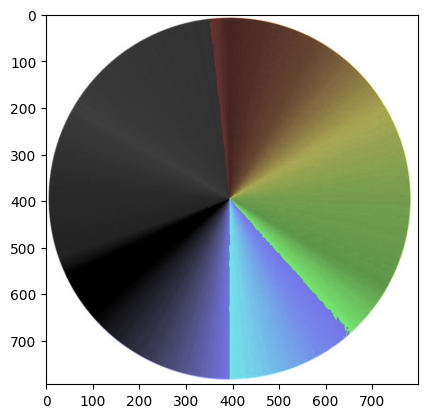

In [22]:
# Converter a imagem de volta para RGB manualmente
c = v_channel - s_channel
x = c * (1 - np.abs((h_channel / 60) % 2 - 1))
m = np.repeat(c[:, :, np.newaxis], 3, axis=2)

r_prime = np.where((0 <= h_channel) & (h_channel < 60), c, np.where((60 <= h_channel) & (h_channel < 120), x, 0))
g_prime = np.where((0 <= h_channel) & (h_channel < 60), x, np.where((60 <= h_channel) & (h_channel < 120), c, np.where((120 <= h_channel) & (h_channel < 180), x, 0)))
b_prime = np.where((120 <= h_channel) & (h_channel < 180), c, np.where((180 <= h_channel) & (h_channel < 240), x, 0))

image_rgb_modified = np.clip((m + np.stack((r_prime, g_prime, b_prime), axis=2)), 0, 1)

# Voltar ao intervalo [0, 255] e converter para inteiro de 8 bits
image_rgb_modified = (image_rgb_modified * 255).astype(np.uint8)

# Exibir a imagem modificada
plt.imshow(image_rgb_modified)
plt.show()